# KNN from Scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.spatial
from collections import Counter

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df=df.drop('Unnamed: 0',axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
df.shape

(53940, 10)

In [6]:
df.duplicated().sum()

146

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [8]:
df.shape

(53794, 10)

In [9]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [10]:
df.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
df=df.drop(df[df['x']==0].index)
df=df.drop(df[df['y']==0].index)
df=df.drop(df[df['z']==0].index)

In [12]:
df.shape

(53775, 10)

In [13]:
df.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11597
x            553
y            550
z            374
dtype: int64

In [14]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [15]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [16]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

### Data Exploration

#### Univarite Analysis

In [17]:
df.describe()

,carat,depth,table,price,x,y,z
count,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000
mean,0.797536,61.748232,57.457806,3931.220288,5.731579,5.734909,3.539964
std,0.473169,1.429639,2.233257,3985.918716,1.118611,1.139451,0.702017
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


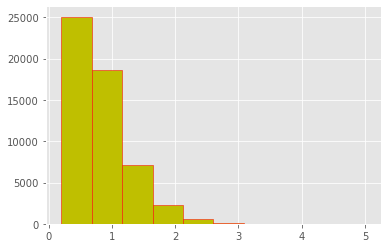

In [18]:
plt.hist(x=df['carat'],color='y',edgecolor='r')
plt.show()

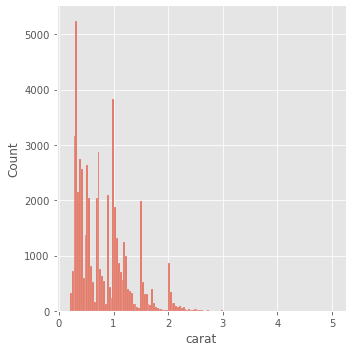

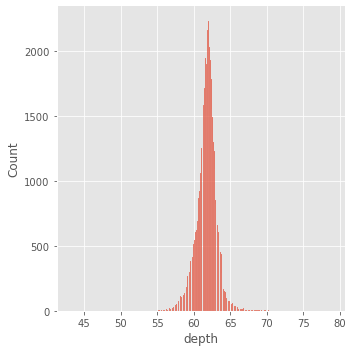

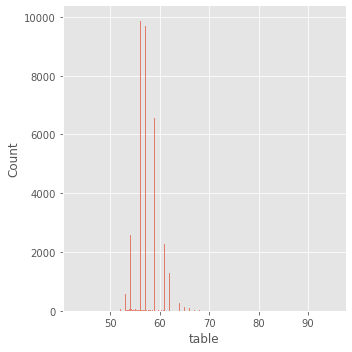

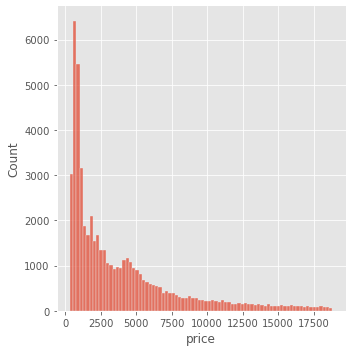

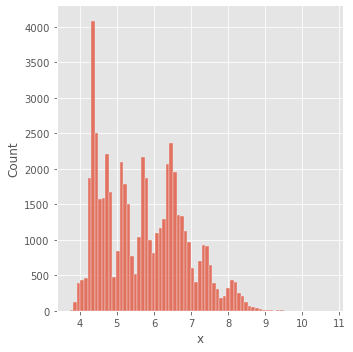

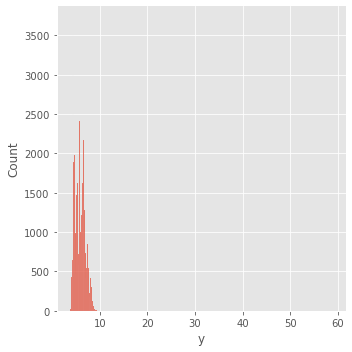

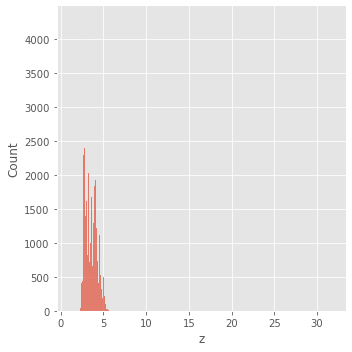

In [19]:
for i in  df.drop(columns=['cut','color','clarity']):
    sns.displot(df[i])
    plt.show()

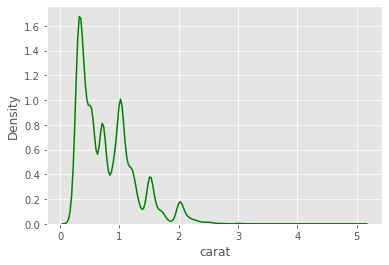

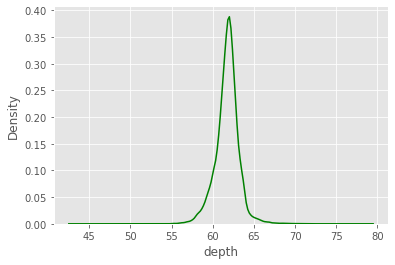

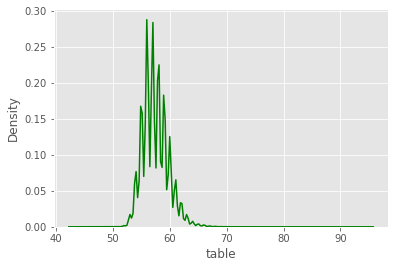

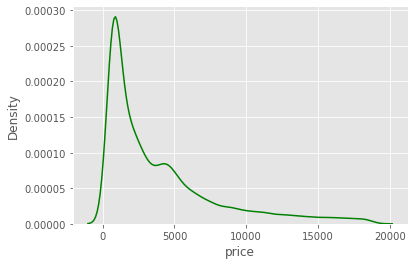

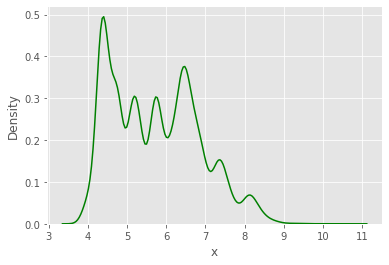

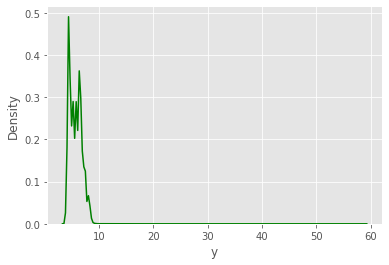

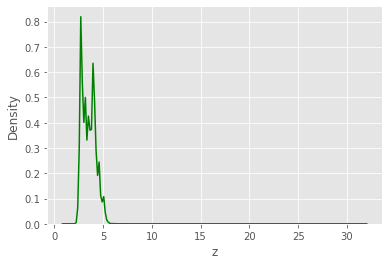

In [20]:
for i in  df.drop(columns=['cut','color','clarity']):
    sns.kdeplot(df[i],color='g')
    plt.show()

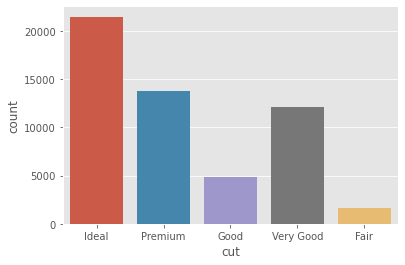

In [21]:
sns.countplot(x=df['cut'])
plt.show()

<AxesSubplot:xlabel='color', ylabel='count'>

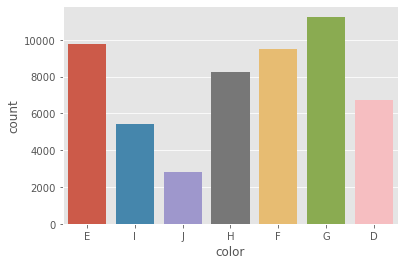

In [22]:
sns.countplot(x=df['color'])

<AxesSubplot:xlabel='clarity', ylabel='count'>

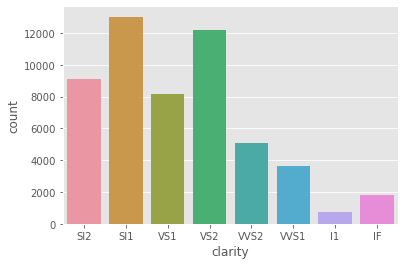

In [23]:
sns.countplot(x=df['clarity'])

#### Bivarite Analysis

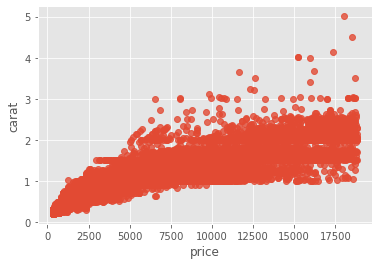

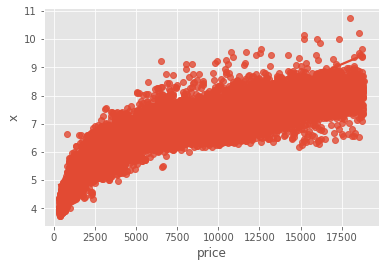

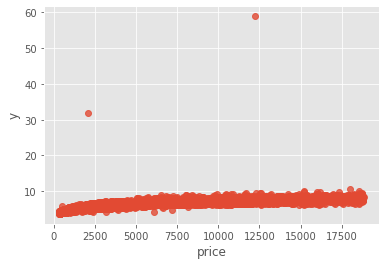

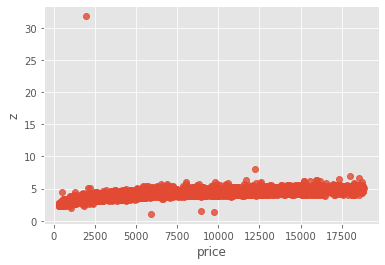

In [24]:
for i in  df.drop(columns=['cut','color','clarity','price','table','depth']):
    sns.regplot(x='price',y=i,data=df)
    plt.show()

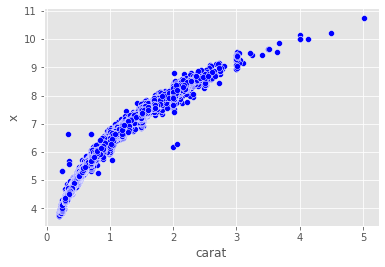

In [25]:
sns.scatterplot(x='carat',y='x',data=df,color='b')
plt.show()

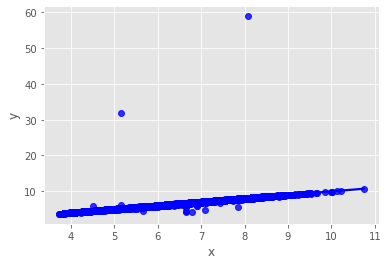

In [26]:
sns.regplot(x='x',y='y',data=df,color='b')
plt.show()

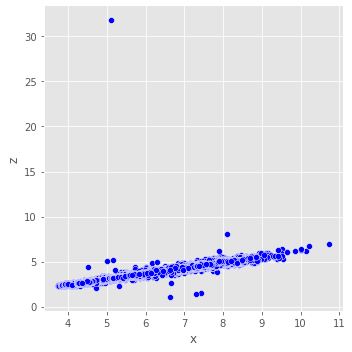

In [27]:
sns.relplot(x='x',y='z',data=df,color='b')
plt.show()

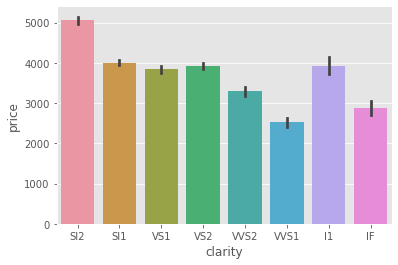

In [28]:
sns.barplot(x='clarity',y='price',data=df)
plt.show()

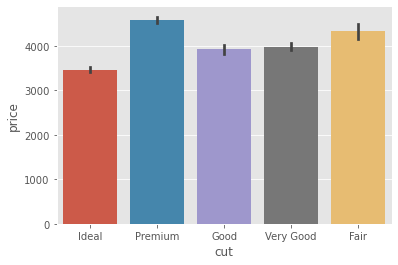

In [29]:
sns.barplot(x='cut',y='price',data=df)
plt.show()

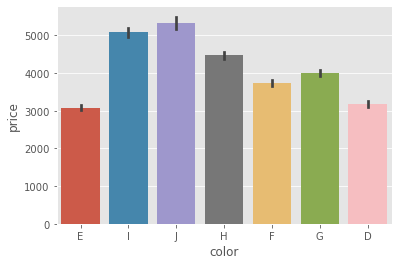

In [30]:
sns.barplot(x='color',y='price',data=df)
plt.show()

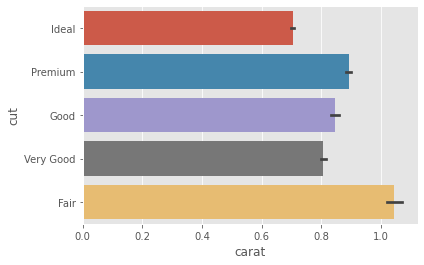

In [31]:
sns.barplot(x='carat',y='cut',data=df)
plt.show()

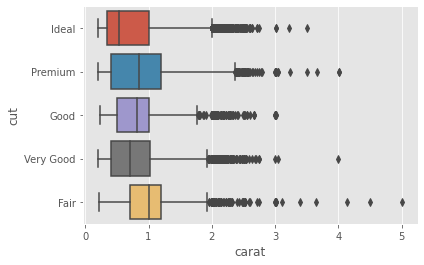

In [32]:
sns.boxplot(x='carat',y='cut',data=df)
plt.show()

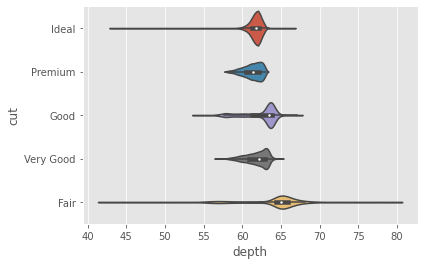

In [33]:
sns.violinplot(x='depth',y='cut',data=df)
plt.show()

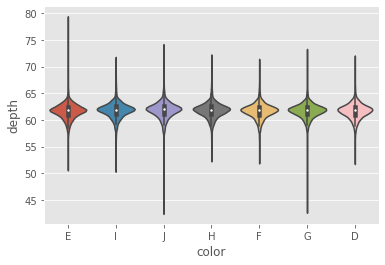

In [34]:
sns.violinplot(x='color',y='depth',data=df)
plt.show()

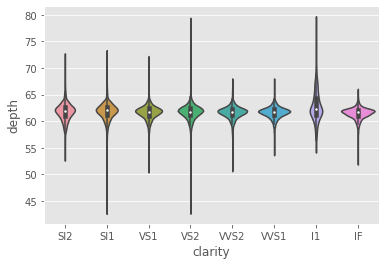

In [35]:
sns.violinplot(y='depth',x='clarity',data=df)
plt.show()

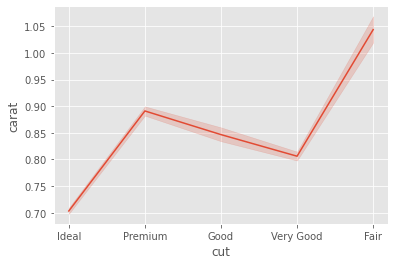

In [36]:
sns.lineplot(y='carat',x='cut',data=df)
plt.show()

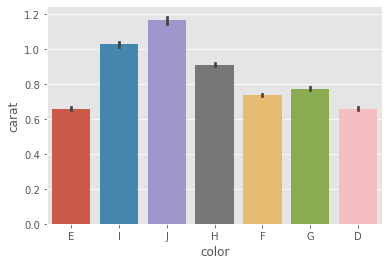

In [37]:
sns.barplot(x='color',y='carat',data=df)
plt.show()

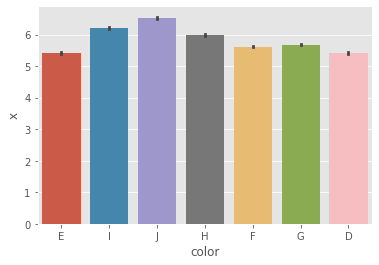

In [38]:
sns.barplot(x='color',y='x',data=df)
plt.show()

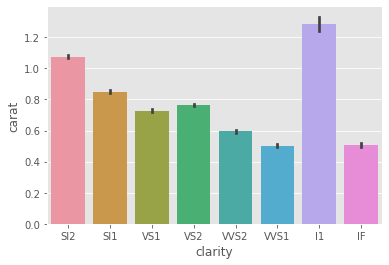

In [39]:
sns.barplot(x='clarity',y='carat',data=df)
plt.show()

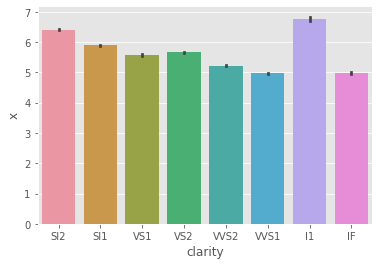

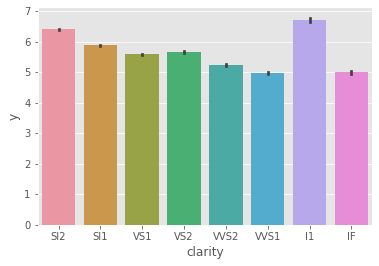

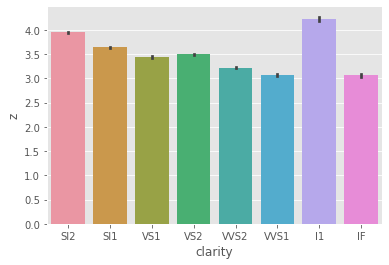

In [40]:
for i in ['x','y','z']:
    sns.barplot(x='clarity',y=i,data=df)
    plt.show()

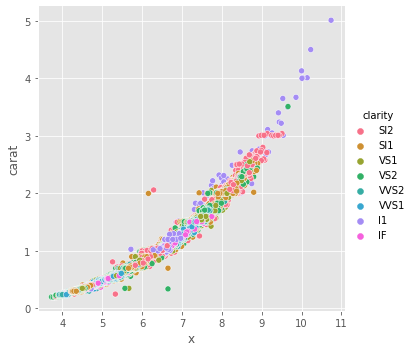

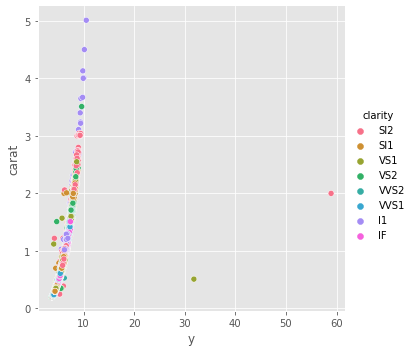

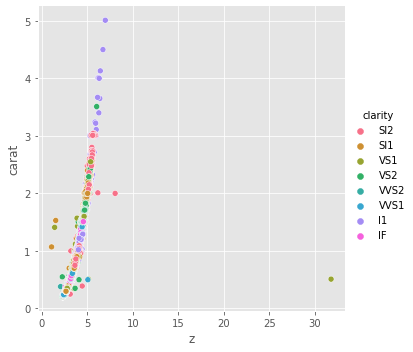

In [41]:
for i in['x','y','z']:
    sns.relplot(y='carat',x=i,hue='clarity',data=df)
    plt.show()

<AxesSubplot:>

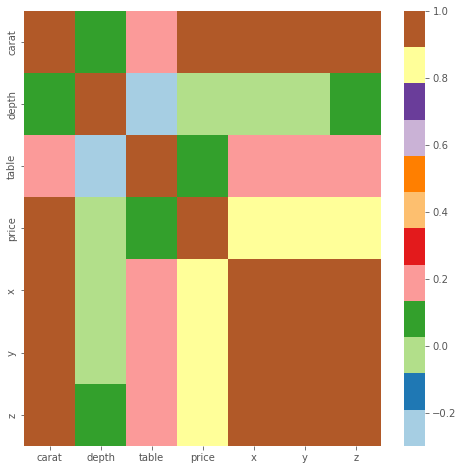

In [42]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),cmap='Paired')

In [43]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [44]:
y=df['price']


In [45]:
# We drop depth and table because cor relation of them with price is less than 0.5
X=df.drop(['price','depth','table'],axis=1)


In [46]:
X.head()

,carat,cut,color,clarity,x,y,z
0,0.23,Ideal,E,SI2,3.95,3.98,2.43
1,0.21,Premium,E,SI1,3.89,3.84,2.31
2,0.23,Good,E,VS1,4.05,4.07,2.31
3,0.29,Premium,I,VS2,4.20,4.23,2.63
4,0.31,Good,J,SI2,4.34,4.35,2.75


In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['cut','clarity']:
    X[col]=le.fit_transform(X[col])
X.head()

,carat,cut,color,clarity,x,y,z
0,0.23,2,E,3,3.95,3.98,2.43
1,0.21,3,E,2,3.89,3.84,2.31
2,0.23,1,E,4,4.05,4.07,2.31
3,0.29,3,I,5,4.20,4.23,2.63
4,0.31,1,J,3,4.34,4.35,2.75


In [48]:
X.describe()

,carat,cut,clarity,x,y,z
count,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000
mean,0.797536,2.553993,3.836039,5.731579,5.734909,3.539964
std,0.473169,1.027579,1.724817,1.118611,1.139451,0.702017
min,0.200000,0.000000,0.000000,3.730000,3.680000,1.070000
25%,0.400000,2.000000,2.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,4.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,5.000000,6.540000,6.540000,4.030000
max,5.010000,4.000000,7.000000,10.740000,58.900000,31.800000


In [49]:
X['color']=X['color'].map({'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7,'NA':8})

In [50]:
X['color']=X['color'].fillna(0)

In [51]:
X['color'].isnull().sum()

0

In [52]:
X.head()

,carat,cut,color,clarity,x,y,z
0,0.23,2,2,3,3.95,3.98,2.43
1,0.21,3,2,2,3.89,3.84,2.31
2,0.23,1,2,4,4.05,4.07,2.31
3,0.29,3,6,5,4.20,4.23,2.63
4,0.31,1,7,3,4.34,4.35,2.75


In [53]:
X.describe()

,carat,cut,color,clarity,x,y,z
count,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000
mean,0.797536,2.553993,3.593733,3.836039,5.731579,5.734909,3.539964
std,0.473169,1.027579,1.701271,1.724817,1.118611,1.139451,0.702017
min,0.200000,0.000000,1.000000,0.000000,3.730000,3.680000,1.070000
25%,0.400000,2.000000,2.000000,2.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,4.000000,4.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,5.000000,5.000000,6.540000,6.540000,4.030000
max,5.010000,4.000000,7.000000,7.000000,10.740000,58.900000,31.800000


In [54]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [55]:
X=X[0:5000]
y=y[0:5000]

In [57]:
print('Independent features Shape : ', X.shape)
print('Dependent features Shape   : ', y.shape)  

Independent features Shape :  (5000, 7)
Dependent features Shape   :  (5000,)


In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [59]:
print( x_train.shape)
print( x_test.shape)
print( y_train.shape)
print( y_test.shape)

(3750, 7)
(1250, 7)
(3750,)
(1250,)


In [60]:
y_train

129     2763
143     2767
4401     571
2392     561
423     2812
        ... 
1179    2930
255     2789
2943    3293
2197    3139
318     2801
Name: price, Length: 3750, dtype: int64

In [61]:
y_train.to_frame()
y_train.iloc[1]

2767

### Knn from Scratch without sklearn

In [62]:
class KNN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.x_train = X
        self.y_train = y
        
    def distance(self, X1, X2):
        distance = scipy.spatial.distance.euclidean(X1, X2)
    
    def predict(self, x_test):
        final_output = []
        for i in range(len(x_test)):
            d = []
            votes = []
            for j in range(len(x_train)):
                dist = scipy.spatial.distance.euclidean(x_train[j] , x_test[i])
                d.append([dist, j])
            d.sort()
            d = d[0:self.k]
            for e in d:
                votes.append(y_train.iloc[e[1]])
            ans = np.mean(votes)
            final_output.append(ans)
            
        return final_output


In [63]:
reg = KNN(5)
reg.fit(x_train, y_train)
prediction = reg.predict(x_test)
y_pred_test=[]
for i in prediction:
    y_pred_test.append(i)


In [64]:
y_test=np.array(y_test)
y_test_new=[]
for i in y_test:
    y_test_new.append(i)


In [70]:
print("Y Predict | Y Test")
for i in range(10):
    print(str(y_pred_test[i])+" | "+str(y_test_new[i]))

Y Predict | Y Test
3234.6 | 2839
3428.6 | 3692
3050.8 | 3033
3328.0 | 3265
3489.2 | 3267
3009.4 | 2826
3006.8 | 3018
533.2 | 556
2889.2 | 2856
3304.2 | 3043


#### Here Y Predict i nearly close to Y Test

In [65]:
# finding mean Square Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred_test,y_test_new)

51109.28064

### Knn from Scratch with sklearn

In [66]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors = 5)
regressor.fit(x_train, y_train)

KNeighborsRegressor()

In [67]:
y_pred = regressor.predict(x_test)
mean_squared_error(y_pred,y_test)

51109.28064

####  You can find the mean Square error is same